In [1]:
import keras
import pandas as pd
import numpy as np

Читаем датасет с очищенными строками

In [12]:
df = pd.read_csv('dataset.csv')

In [ ]:
"""
import re
import pymorphy2

ma = pymorphy2.MorphAnalyzer()

def clean_text(text):
    try:
     text = text.replace("\\", " ").replace(u"╚", " ").replace(u"╩", " ")
     text = text.lower()
     text = re.sub('\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', text) #deleting newlines and line-breaks
     text = re.sub('[.,:;_%©?*,!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text) #deleting symbols  
     text = " ".join(ma.parse(str(word))[0].normal_form for word in text.split())
     text = ' '.join(word for word in text.split() if len(word)>3)
     text = text.encode("utf-8")
    except:
     print(text)

    return text

df['Description'] = df.apply(lambda x: clean_text(x['Post_clean']), axis=1)
"""

In [13]:
df

,Unnamed: 0,OPISANIE_CLEAN,TNVED,TNVED2
0,0,части принадлежности аппаратуры поз 9025 военн...,9025,90
1,1,трансформаторы мощностью 1 ква 16 ква лом элек...,8504,85
2,2,клапаны запорные стали военного назначения,8481,84
3,3,устройства сигнализационные охранные устройств...,8531,85
4,4,вещества поверхностно активные органические ан...,3402,34
...,...,...,...,...
4177894,4177894,минеральное моторное масло всесезонное дизельн...,2710,27
4177895,4177895,синтетическое моторное масло всесезонное дизел...,3403,34
4177896,4177896,синтетическое моторное масло всесезонное дизел...,3403,34
4177897,4177897,масло трансмиссионное синтетической основе сод...,3403,34


Считаем количество разных классов - групп товаров

In [14]:
categories = {}
for key,value in enumerate(df['TNVED2'].unique()):
    categories[value] = key + 1

# Запишем в новую колонку числовое обозначение категории 
df['category_code'] = df['TNVED2'].map(categories)

total_categories = len(df['TNVED2'].unique()) + 1
print('Всего категорий: {}'.format(total_categories))

Всего категорий: 97


In [15]:
df.to_pickle('dataframe_ver_1.pkl')

In [5]:
df = pd.read_pickle('dataframe_ver_1.pkl')

Забираем 30% набора (можно меньше, чтобы протестировать обучение быстрей)

In [16]:
df = df.sample(frac=.3).reset_index(drop=True)

In [17]:
display(df)

,Unnamed: 0,OPISANIE_CLEAN,TNVED,TNVED2,category_code
0,951164,брюки швейные мужские хлопчатобумажной пряжи и...,6203,62,39
1,3292379,детская одежда принадлежности детской одежде к...,6209,62,39
2,2854083,щипцы завивки ресниц,9615,96,19
3,2024181,оборудование санитарно техническое части черны...,7324,73,5
4,2152850,грибы эноки свежие выращено кнр окпд2 01 13 80...,709,7,25
...,...,...,...,...,...
1253365,2320165,4 фитинги пластмассы пластиковых трубок гражда...,3917,39,15
1253366,3901384,трусы взрослых женские трикотажные машинного в...,6108,61,13
1253367,4072304,пальто швейные текстильные нетрикотажные женск...,6202,62,39
1253368,1685831,изделия трикотажные верхние второго слоя брюки...,6103,61,13


Удаляем битые строки

In [18]:
df = df[df['OPISANIE_CLEAN'].notna()]
display(df)

,Unnamed: 0,OPISANIE_CLEAN,TNVED,TNVED2,category_code
0,951164,брюки швейные мужские хлопчатобумажной пряжи и...,6203,62,39
1,3292379,детская одежда принадлежности детской одежде к...,6209,62,39
2,2854083,щипцы завивки ресниц,9615,96,19
3,2024181,оборудование санитарно техническое части черны...,7324,73,5
4,2152850,грибы эноки свежие выращено кнр окпд2 01 13 80...,709,7,25
...,...,...,...,...,...
1253365,2320165,4 фитинги пластмассы пластиковых трубок гражда...,3917,39,15
1253366,3901384,трусы взрослых женские трикотажные машинного в...,6108,61,13
1253367,4072304,пальто швейные текстильные нетрикотажные женск...,6202,62,39
1253368,1685831,изделия трикотажные верхние второго слоя брюки...,6103,61,13


Генерим train и test

In [19]:
descriptions = df['OPISANIE_CLEAN']
categories = df[u'TNVED2']
display(descriptions)
display(categories)

0          брюки швейные мужские хлопчатобумажной пряжи и...
1          детская одежда принадлежности детской одежде к...
2                                       щипцы завивки ресниц
3          оборудование санитарно техническое части черны...
4          грибы эноки свежие выращено кнр окпд2 01 13 80...
                                 ...                        
1253365    4 фитинги пластмассы пластиковых трубок гражда...
1253366    трусы взрослых женские трикотажные машинного в...
1253367    пальто швейные текстильные нетрикотажные женск...
1253368    изделия трикотажные верхние второго слоя брюки...
1253369    гидравлическое оборудование линейного действия...
Name: OPISANIE_CLEAN, Length: 1253361, dtype: object

0          62
1          62
2          96
3          73
4           7
           ..
1253365    39
1253366    61
1253367    62
1253368    61
1253369    84
Name: TNVED2, Length: 1253361, dtype: int64

In [20]:
# Посчитаем максимальную длинну текста описания в словах
max_words = 0
for desc in descriptions:
    words = len(desc.split())
    if words > max_words:
        max_words = words
print('Максимальная длина описания: {} слов'.format(max_words))

Максимальная длина описания: 69 слов


In [21]:
maxSequenceLength = 20

Обучаем токенизатор текста на наших описаниях

In [22]:
from keras.preprocessing.text import Tokenizer

# создаем единый словарь (слово -> число) для преобразования
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions.tolist())

# Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
textSequences = tokenizer.texts_to_sequences(descriptions.tolist())

In [23]:
def load_data_from_arrays(strings, labels, train_test_split=0.9):
    data_size = len(strings)
    test_size = int(data_size - round(data_size * train_test_split))
    print("Test size: {}".format(test_size))
    
    print("\nTraining set:")
    x_train = strings[test_size:]
    print("\t - x_train: {}".format(len(x_train)))
    y_train = labels[test_size:]
    print("\t - y_train: {}".format(len(y_train)))
    
    print("\nTesting set:")
    x_test = strings[:test_size]
    print("\t - x_test: {}".format(len(x_test)))
    y_test = labels[:test_size]
    print("\t - y_test: {}".format(len(y_test)))

    return x_train, y_train, x_test, y_test

In [24]:
X_train, y_train, X_test, y_test = load_data_from_arrays(textSequences, categories, train_test_split=0.8)
total_words = len(tokenizer.word_index)
print('В словаре {} слов'.format(total_words))

Test size: 250672

Training set:
	 - x_train: 1002689
	 - y_train: 1002689

Testing set:
	 - x_test: 250672
	 - y_test: 250672
В словаре 343247 слов


In [25]:
num_words = 1000

print(u'Преобразуем описания в векторы чисел...')
tokenizer = Tokenizer(num_words=num_words)


Преобразуем описания в векторы чисел...


In [38]:
from keras.utils import np_utils

num_classes = 98
X_train2 = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test2 = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('Размерность X_train:', X_train2.shape)
print('Размерность X_test:', X_test2.shape)

print(u'Преобразуем категории в матрицу двоичных чисел '
      u'(для использования categorical_crossentropy)')
y_train2 = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.np_utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train2.shape)
print('y_test shape:', y_test2.shape)

Размерность X_train: (334229, 1000)
Размерность X_test: (83557, 1000)
Преобразуем категории в матрицу двоичных чисел (для использования categorical_crossentropy)
y_train shape: (334229, 98)
y_test shape: (83557, 98)


### FCN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

# количество эпох\итераций для обучения
epochs = 5

print(u'Собираем модель...')
model = Sequential()
model.add(Dense(512, input_shape=(num_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

In [ ]:
history = model.fit(X_train2, y_train2,
                    batch_size=32,
                    epochs=10,
                    verbose=1)

In [ ]:
score = model.evaluate(X_test2, y_test2,
                       batch_size=32, verbose=1)
print()
print('Loss: {}'.format(score[0]))
print('Accuracy: {}'.format(score[1]))

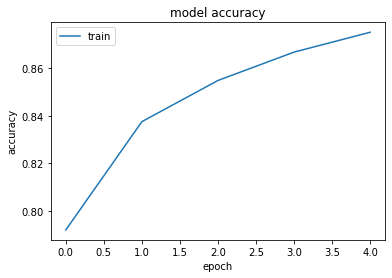

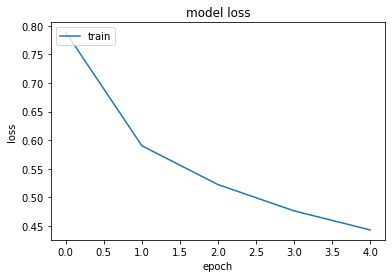

In [42]:
import matplotlib.pyplot as plt

# График точности модели
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# График оценки loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
pred = model.predict(X_test2, batch_size=32, verbose=1)

2612/2612 [==============================] - 4s 2ms/step


In [53]:
pred2 = np.argmax(pred, axis=1)
print(pred2)
print(y_test.values)
from sklearn import metrics
print(metrics.classification_report(pred2,y_test.values))


[18 96 76 ... 73 87 82]
[25 82 76 ... 73 87 82]
              precision    recall  f1-score   support

           1       0.56      0.88      0.68        17
           2       0.65      0.87      0.74       112
           3       0.74      0.83      0.78       172
           4       0.83      0.92      0.87       142
           5       0.53      0.80      0.64        10
           6       0.87      0.93      0.90       658
           7       0.68      0.69      0.68       487
           8       0.86      0.84      0.85       952
           9       0.54      0.59      0.56       189
          10       0.57      0.76      0.65        50
          11       0.45      0.61      0.52        69
          12       0.59      0.64      0.61       105
          13       0.00      0.00      0.00         5
          14       0.44      0.80      0.57         5
          15       0.70      0.63      0.66       127
          16       0.89      0.84      0.86       310
          17       0.58      0.80

/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LSTM

In [26]:
from keras.preprocessing.text import Tokenizer

# создаем единый словарь (слово -> число) для преобразования
lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(descriptions.tolist())

# Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
lstm_textSequences = lstm_tokenizer.texts_to_sequences(descriptions.tolist())

In [27]:
X_train3, y_train3, X_test3, y_test3 = load_data_from_arrays(lstm_textSequences, categories, train_test_split=0.8)
# Максимальное количество слов в самом длинном описании заявки
max_words = 0
for desc in descriptions.tolist():
    words = len(desc.split())
    if words > max_words:
        max_words = words
print('Максимальное количество слов в самом длинном описании заявки: {} слов'.format(max_words))

total_unique_words = len(lstm_tokenizer.word_counts)
print('Всего уникальных слов в словаре: {}'.format(total_unique_words))

maxSequenceLength = max_words

Test size: 250672

Training set:
	 - x_train: 1002689
	 - y_train: 1002689

Testing set:
	 - x_test: 250672
	 - y_test: 250672
Максимальное количество слов в самом длинном описании заявки: 69 слов
Всего уникальных слов в словаре: 343247


In [29]:
vocab_size = round(total_unique_words/50)

In [30]:
lstm_tokenizer = Tokenizer(num_words=vocab_size)
lstm_tokenizer.fit_on_texts(descriptions)

In [31]:
print(X_train[0])

[14746, 272, 204432, 50, 191, 272, 164, 2621, 88, 90505, 9, 37, 106427, 8, 4970, 11, 14746, 272, 204433, 50, 191, 272, 164, 2621, 88, 90505, 9, 37, 59900, 8, 4970, 11, 14746, 272, 204434, 50, 191, 272, 164, 2621, 88, 90505, 9]


In [33]:
num_classes=98

In [34]:
from keras.preprocessing.sequence import pad_sequences
#X_train4 = lstm_tokenizer.texts_to_sequences(X_train)
#X_test4 = lstm_tokenizer.texts_to_sequences(X_test)

X_train4 = pad_sequences(X_train, maxlen=maxSequenceLength)
X_test4 = pad_sequences(X_test, maxlen=maxSequenceLength)

print('Размерность X_train:', X_train4.shape)
print('Размерность X_test:', X_test4.shape)

print(u'Преобразуем категории в матрицу двоичных чисел '
      u'(для использования categorical_crossentropy)')

y_train4 = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test4 = keras.utils.np_utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train4.shape)
print('y_test shape:', y_test4.shape)

Размерность X_train: (1002689, 69)
Размерность X_test: (250672, 69)
Преобразуем категории в матрицу двоичных чисел (для использования categorical_crossentropy)
y_train shape: (1002689, 98)
y_test shape: (250672, 98)


In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = 98
print('Количество категорий для классификации: {}'.format(num_classes))

Количество категорий для классификации: 98


In [36]:
from  keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# максимальное количество слов для анализа
max_features = vocab_size

print(u'Собираем модель...')
model = Sequential()
model.add(Embedding(max_features, maxSequenceLength))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())


Собираем модель...


2022-06-04 20:30:02.148818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.208019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.208343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.211651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.211923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 69)          473685    
                                                                 
 lstm (LSTM)                 (None, 32)                13056     
                                                                 
 dense (Dense)               (None, 98)                3234      
                                                                 
Total params: 489,975
Trainable params: 489,975
Non-trainable params: 0
_________________________________________________________________
None


ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.816387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 20:30:02.816582: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4794 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1


In [58]:
batch_size = 512
epochs = 10

print(u'Тренируем модель...')
history = model.fit(np.array(X_train4), np.array(y_train4),
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(np.array(X_test4), np.array(y_test4))
                   )


Тренируем модель...
Epoch 1/10
1959/1959 [==============================] - 820s 418ms/step - loss: 0.0057 - accuracy: 0.9147 - val_loss: 0.0054 - val_accuracy: 0.9189
Epoch 2/10
1959/1959 [==============================] - 821s 419ms/step - loss: 0.0052 - accuracy: 0.9224 - val_loss: 0.0050 - val_accuracy: 0.9236
Epoch 3/10
1959/1959 [==============================] - 821s 419ms/step - loss: 0.0048 - accuracy: 0.9264 - val_loss: 0.0047 - val_accuracy: 0.9269
Epoch 4/10
1959/1959 [==============================] - 821s 419ms/step - loss: 0.0045 - accuracy: 0.9298 - val_loss: 0.0045 - val_accuracy: 0.9290
Epoch 5/10
1959/1959 [==============================] - 817s 417ms/step - loss: 0.0043 - accuracy: 0.9324 - val_loss: 0.0044 - val_accuracy: 0.9305
Epoch 6/10
1959/1959 [==============================] - 822s 419ms/step - loss: 0.0042 - accuracy: 0.9345 - val_loss: 0.0043 - val_accuracy: 0.9326
Epoch 7/10
1959/1959 [==============================] - 822s 419ms/step - loss: 0.0040 - acc

In [59]:
score = model.evaluate(np.array(X_test4), np.array(y_test4),
                       batch_size=batch_size, verbose=1)
print()
print(u'Loss: {}'.format(score[0]))
print(u'Accuracy: {}'.format(score[1]))

490/490 [==============================] - 25s 52ms/step - loss: 0.0040 - accuracy: 0.9362

Loss: 0.0040199849754571915
Accuracy: 0.936159610748291


In [66]:
#Save model for inference 
model_json = model.to_json()
with open("lstm_2_digits.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("lstm_2_digits.h5")
print("Saved model to disk")
    
np.save('encoder_classes.npy', encoder.classes_)


import io
import json
tokenizer_json = lstm_tokenizer.to_json()
with io.open('lstm_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

Saved model to disk


In [ ]:
pred = model.predict(X_test4, batch_size=512, verbose=1)


In [65]:
pred2 = np.argmax(pred, axis=1)
print(pred2)
print(y_test4)
from sklearn import metrics
print(metrics.classification_report(pred2, np.argmax(y_test4, axis=1)))

[62 62 85 ... 73 62 61]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.81      0.95      0.87        61
           2       0.95      0.93      0.94       410
           3       0.94      0.94      0.94       611
           4       0.94      0.92      0.93       563
           5       0.27      1.00      0.43         9
           6       0.99      1.00      1.00      2068
           7       0.93      0.91      0.92      1414
           8       0.97      0.96      0.97      2904
           9       0.79      0.91      0.85       491
          10       0.84      0.94      0.89       174
          11       0.91      0.90      0.91       322
          12       0.75      0.78      0.76       272
          13       0.15      0.64      0.24        14
          14       0.00      0.00      0.00         0
          15       0.88      0.93      0.90       364
          16       0.91      0.96      0.94       904
          17       0.84      0.87      0.85       718
          18       0.90    

/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eugene/miniconda3/envs/tester4/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
input_line = 'изделия прочие пластмасс изделия прочих материалов товарных позиций 3901 3914 прочие прочие прочие прочие'
#input_line = 'прочие семена плоды прочих масличных культур'
text_sec = lstm_tokenizer.texts_to_sequences([input_line])
#print(text_sec)
text_sec = pad_sequences(text_sec, maxlen=69)
#print(text_sec)
pred = model.predict(text_sec, batch_size=1, verbose=1)
print(np.argmax(pred,axis=1))

1/1 [==============================] - 0s 76ms/step
[39]
